<a href="https://colab.research.google.com/github/genuguru/IT7143/blob/main/Assignment1_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Set Up Your Environment**
First, you need to set up your environment in Google Colab. This includes installing necessary libraries and authenticating your Google Cloud account.

In [2]:
# Install the Google Cloud BigQuery library
!pip install google-cloud-bigquery

**Step 2: Authenticate Your Google Account**
You need to authenticate your Google account to access BigQuery.

In [3]:
from google.colab import auth
auth.authenticate_user()

print("Aunthenticated")

# Set up the BigQuery client
from google.cloud import bigquery





Aunthenticated


**Step 3: Query a Public Dataset**
BigQuery has many public datasets that you can explore. For this example, let's query the USA Names dataset, which contains information about names in the US.

In [94]:
# Define the SQL query
# Query for Crime rates by year
query1 = " SELECT year,count(*) AS crimecount FROM bigquery-public-data.chicago_crime.crime GROUP BY year order by year "

#associate with a create project id
project_id = 'it7143-cloud-analytics'

#ASSOCIATE bigquery client and the project
client = bigquery.Client(project=project_id)

# Execute the query via the client
query_job = client.query(query1)

# Get the result
results = query_job.result()



In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the query result to a pandas DataFrame
df1 = results.to_dataframe()

# Display the DataFrame
print(df1)

    year  crimecount
0   2001      485914
1   2002      486820
2   2003      475989
3   2004      469431
4   2005      453779
5   2006      448188
6   2007      437089
7   2008      427197
8   2009      392841
9   2010      370538
10  2011      352009
11  2012      336332
12  2013      307563
13  2014      275834
14  2015      264843
15  2016      269893
16  2017      269175
17  2018      269010
18  2019      261474
19  2020      212422
20  2021      209231
21  2022      239401
22  2023      261948
23  2024      101833


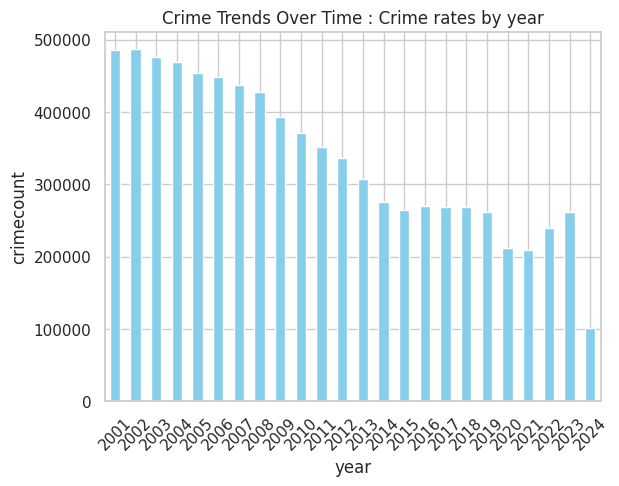

In [96]:
# Plot Crime rates by year
df1.plot(kind='bar', x='year', y='crimecount', color='skyblue', legend=None)
plt.title('Crime Trends Over Time : Crime rates by year')
plt.xlabel('year')
plt.ylabel('crimecount')
plt.xticks(rotation=45)
plt.show()

In [97]:
# Define the SQL query
# Query for Monthly distribution for the current year
query2 = " SELECT EXTRACT(MONTH FROM date) AS MONTH, COUNT(*) AS TOTAL_CRIMES FROM `bigquery-public-data.chicago_crime.crime` WHERE year = EXTRACT(YEAR FROM CURRENT_DATE())  GROUP BY MONTH ORDER BY MONTH "

#associate with a create project id
#project_id = 'it7143-cloud-analytics'

#ASSOCIATE bigquery client and the project
#client = bigquery.Client(project=project_id)

# Execute the query via the client
query_job = client.query(query2)

# Get the result
results = query_job.result()

**Step 4: Load Results into a DataFrame**
For easier data manipulation, load the results into a Pandas DataFrame.

**Step 5: Perform Analysis**
You can now perform further analysis on the DataFrame. For instance, you can plot the data to visualize the most common names.

In [98]:
# Convert the query result to a pandas DataFrame
df2 = results.to_dataframe()

# Display the DataFrame
print(df2)

   MONTH  TOTAL_CRIMES
0      1         19350
1      2         19718
2      3         20636
3      4         20051
4      5         22058
5      6            20


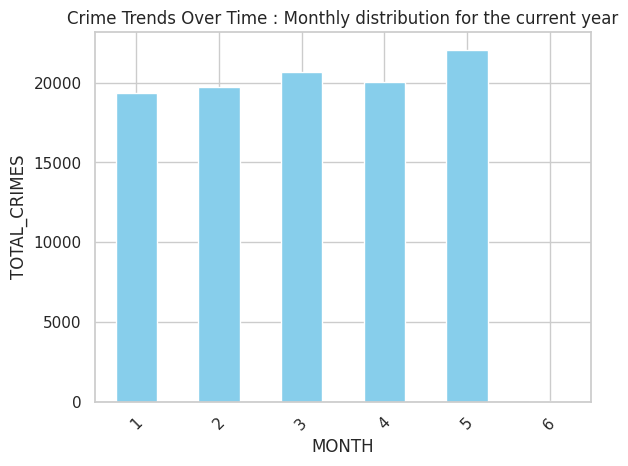

In [99]:
# Plot the Monthly distribution for the current year
df2.plot(kind='bar', x='MONTH', y='TOTAL_CRIMES', color='skyblue', legend=None)
plt.title('Crime Trends Over Time : Monthly distribution for the current year')
plt.xlabel('MONTH')
plt.ylabel('TOTAL_CRIMES')
plt.xticks(rotation=45)
plt.show()

In [103]:
# Define the SQL query
# Query for Peak times for different types of crimes during the day
query3 = " SELECT EXTRACT(HOUR FROM date) AS hour_of_day, COUNT(*) AS total_crimes FROM `bigquery-public-data.chicago_crime.crime` GROUP BY hour_of_day ORDER BY total_crimes DESC LIMIT 1 "

#associate with a create project id
#project_id = 'it7143-cloud-analytics'

#ASSOCIATE bigquery client and the project
#client = bigquery.Client(project=project_id)

# Execute the query via the client
query_job = client.query(query3)

# Get the result
results = query_job.result()

In [104]:
# Convert the query result to a pandas DataFrame
df3 = results.to_dataframe()

# Display the DataFrame
print(df3)

   hour_of_day  total_crimes
0           12        929385


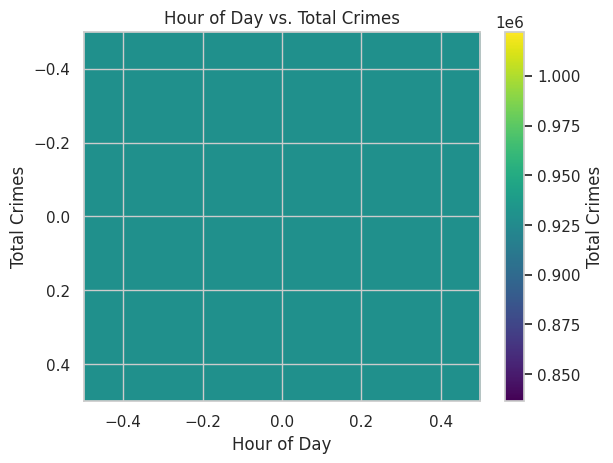

In [105]:
# Plot the Peak times for different types of crimes during the day
# Sample data (replace this with your actual data)
hour_of_day = [12]
total_crimes = [929272]

# Create a 2D array (matrix) from the data
data_matrix = np.array([total_crimes])

# Create the heatmap
plt.imshow(data_matrix, cmap='viridis', aspect='auto')

# Customize the plot
plt.title('Hour of Day vs. Total Crimes')
plt.xlabel('Hour of Day')
plt.ylabel('Total Crimes')
plt.colorbar(label='Total Crimes')



In [106]:
# Define the SQL query
# Query for Peak times for different types of crimes during the week
query4 = " SELECT FORMAT_TIMESTAMP('%A', date) AS day_of_week, COUNT(*) AS total_crimes FROM `bigquery-public-data.chicago_crime.crime` GROUP BY day_of_week ORDER BY total_crimes DESC LIMIT 1 "

#associate with a create project id
#project_id = 'it7143-cloud-analytics'

#ASSOCIATE bigquery client and the project
#client = bigquery.Client(project=project_id)

# Execute the query via the client
query_job = client.query(query4)

# Get the result
results = query_job.result()

In [107]:
# Convert the query result to a pandas DataFrame
df4 = results.to_dataframe()

# Display the DataFrame
print(df4)

  day_of_week  total_crimes
0      Friday       1212792


In [44]:
# Plot the Peak times for different types of crimes during the day

In [113]:
# Define the SQL query
# Query for Peak times for different types of crimes during the week
query5 = """ SELECT
    CASE
        WHEN primary_type IN ('HOMICIDE', 'ASSAULT', 'ROBBERY', 'BATTERY') THEN 'Violent crime'
        WHEN primary_type IN ('BURGLARY', 'LARCENY', 'MOTOR VEHICLE THEFT') THEN 'Property crime'
    END AS crime_category,
    COUNT(*) AS crime_count
FROM
    `bigquery-public-data.chicago_crime.crime`
    where primary_type IN ('HOMICIDE', 'ASSAULT', 'ROBBERY', 'BATTERY','BURGLARY', 'LARCENY', 'MOTOR VEHICLE THEFT')

GROUP BY
  crime_category, primary_type

ORDER BY
  crime_category, crime_count DESC """

#associate with a create project id
#project_id = 'it7143-cloud-analytics'

#ASSOCIATE bigquery client and the project
#client = bigquery.Client(project=project_id)

# Execute the query via the client
query_job = client.query(query5)

# Get the result
results = query_job.result()

In [114]:
# Convert the query result to a pandas DataFrame
df5 = results.to_dataframe()

# Display the DataFrame
print(df5)

   crime_category  crime_count
0  Property crime       432743
1  Property crime       404755
2   Violent crime      1473711
3   Violent crime       533262
4   Violent crime       304389
5   Violent crime        13233


Text(0.5, 0, 'Crime Category')

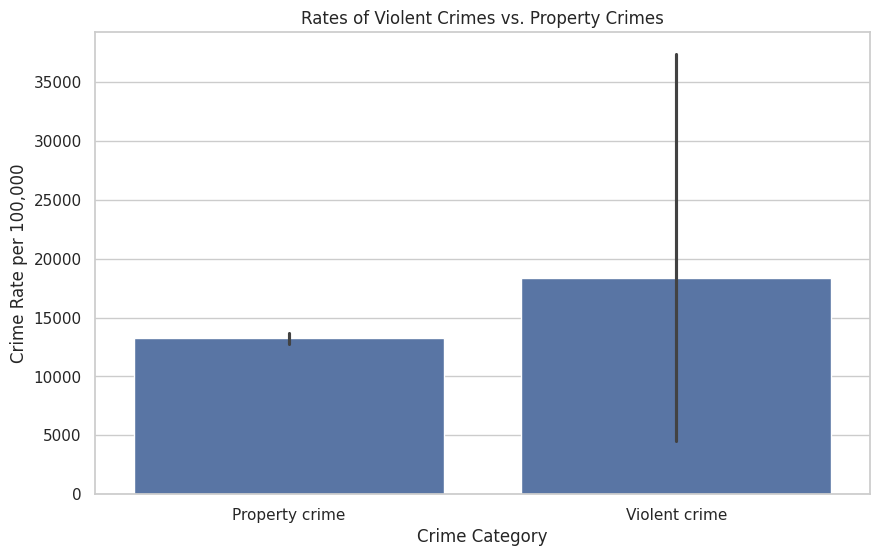

In [116]:
total_crimes = df5['crime_count'].sum()
df5['crime_rate'] = (df5['crime_count'] / total_crimes) * 100000  # Rate per 100,000 for demonstration

# Plotting the graph
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='crime_category', y='crime_rate', data=df5)
bar_plot.set_title('Rates of Violent Crimes vs. Property Crimes')
bar_plot.set_ylabel('Crime Rate per 100,000')
bar_plot.set_xlabel('Crime Category')